<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%ED%87%B4%EA%B7%BC%EC%8B%9C%EA%B0%84_%ED%95%98%EC%B0%A8%EC%9D%B8%EC%9B%90_%EC%98%88%EC%B8%A1_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']='b06d525a9f66198051ccb648b091778a'

In [ ]:
!kaggle competitions download -c 2021mlfinalexamp2

  0% 0.00/154 [00:00<?, ?B/s]
100% 154/154 [00:00<00:00, 131kB/s]
  0% 0.00/212k [00:00<?, ?B/s]
100% 212k/212k [00:00<00:00, 67.2MB/s]
  0% 0.00/2.35k [00:00<?, ?B/s]
100% 2.35k/2.35k [00:00<00:00, 2.39MB/s]


In [ ]:
!unzip '*.zip'

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submit.csv')

In [ ]:
train.head()

,year,month,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,holiday
0,2019,9,29,1,3250,0,3281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2019,9,14,1,2871,0,1145,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2019,9,17,0,3074,0,3014,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,2019,9,28,1,3082,0,198,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2019,9,12,0,3247,0,3274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           15000 non-null  int64  
 1   month          15000 non-null  int64  
 2   day            15000 non-null  int64  
 3   weekday        15000 non-null  int64  
 4   bus_route_id   15000 non-null  int64  
 5   in_out         15000 non-null  int64  
 6   station_code   15000 non-null  int64  
 7   6~7_ride       15000 non-null  float64
 8   7~8_ride       15000 non-null  float64
 9   8~9_ride       15000 non-null  float64
 10  9~10_ride      15000 non-null  float64
 11  10~11_ride     15000 non-null  float64
 12  11~12_ride     15000 non-null  float64
 13  6~7_takeoff    15000 non-null  float64
 14  7~8_takeoff    15000 non-null  float64
 15  8~9_takeoff    15000 non-null  float64
 16  9~10_takeoff   15000 non-null  float64
 17  10~11_takeoff  15000 non-null  float64
 18  11~12_

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           30 non-null     int64
 1   month          30 non-null     int64
 2   day            30 non-null     int64
 3   weekday        30 non-null     int64
 4   bus_route_id   30 non-null     int64
 5   in_out         30 non-null     int64
 6   station_code   30 non-null     int64
 7   6~7_ride       30 non-null     int64
 8   7~8_ride       30 non-null     int64
 9   8~9_ride       30 non-null     int64
 10  9~10_ride      30 non-null     int64
 11  10~11_ride     30 non-null     int64
 12  11~12_ride     30 non-null     int64
 13  6~7_takeoff    30 non-null     int64
 14  7~8_takeoff    30 non-null     int64
 15  8~9_takeoff    30 non-null     int64
 16  9~10_takeoff   30 non-null     int64
 17  10~11_takeoff  30 non-null     int64
 18  11~12_takeoff  30 non-null     int64
dtypes: int64(1

target은 18~20_ride 

##EDA

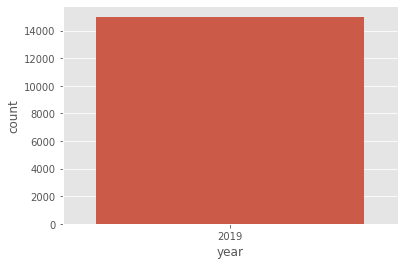

In [ ]:
sns.countplot(data=train,x='year')

2019년 밖에 없다.

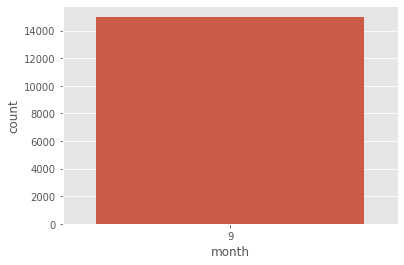

In [ ]:
sns.countplot(data=train,x='month')

없애주는게 나을 것 같다. 

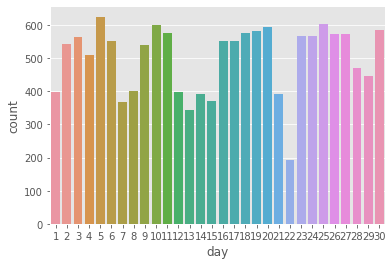

In [ ]:
sns.countplot(data=train,x='day')

In [ ]:
train['day'].value_counts()

5     625
25    604
10    599
20    595
30    584
19    582
11    576
18    575
26    573
27    572
24    568
23    566
3     564
6     552
17    551
16    551
2     542
9     541
4     508
28    471
29    445
8     402
1     398
12    397
14    393
21    392
15    370
7     367
13    344
22    193
Name: day, dtype: int64

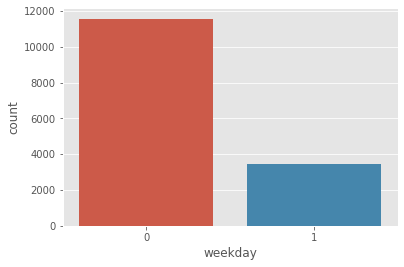

In [ ]:
sns.countplot(data=train,x='weekday')

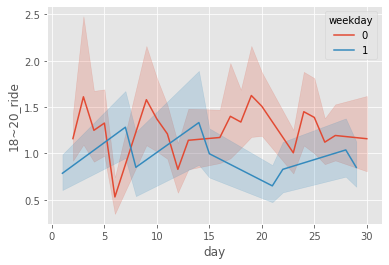

In [ ]:
sns.lineplot(data=train,
             x='day',
             y='18~20_ride',
             hue='weekday')

이게 뭐지. 요일 아닌가? 왜 0과 1값으로 되어있어. 내생각엔 주말인가 주말이 아닌가 그차이인듯

In [ ]:
train['bus_route_id'].value_counts()

2851    173
2850    154
2870    143
2871    142
2849    142
       ... 
2883      1
3209      1
3198      1
3201      1
2955      1
Name: bus_route_id, Length: 578, dtype: int64

In [ ]:
train['in_out'].value_counts()

0    14769
1      231
Name: in_out, dtype: int64

범주형변수

In [ ]:
train['station_code'].value_counts()

358     62
3270    60
321     56
362     52
3271    51
        ..
2473     1
2099     1
3317     1
891      1
540      1
Name: station_code, Length: 2579, dtype: int64

범주형변수

In [ ]:
train['6~7_ride'].value_counts()

0.0     12711
1.0      1304
2.0       507
3.0       213
4.0       109
5.0        58
7.0        22
6.0        19
8.0        12
10.0       10
9.0         9
12.0        9
11.0        7
14.0        2
13.0        2
16.0        2
78.0        1
32.0        1
17.0        1
37.0        1
Name: 6~7_ride, dtype: int64

범주형 변수

In [ ]:
train['7~8_ride'].value_counts()

0.0     10515
1.0      2050
2.0       939
3.0       490
4.0       300
5.0       194
6.0       138
7.0        91
8.0        77
9.0        45
11.0       34
10.0       28
12.0       19
14.0       17
13.0       10
15.0        9
17.0        7
16.0        6
18.0        6
20.0        5
25.0        3
44.0        3
24.0        2
58.0        2
42.0        1
19.0        1
34.0        1
26.0        1
65.0        1
61.0        1
28.0        1
27.0        1
51.0        1
21.0        1
Name: 7~8_ride, dtype: int64

범주형 변수

In [ ]:
train['8~9_ride'].value_counts()

0.0     10619
1.0      2023
2.0       938
3.0       462
4.0       302
5.0       174
6.0       117
7.0        84
8.0        59
9.0        48
10.0       47
12.0       23
11.0       19
13.0       14
14.0       11
16.0        9
15.0        8
17.0        8
19.0        5
18.0        4
21.0        4
23.0        3
20.0        2
35.0        2
28.0        2
25.0        2
26.0        2
27.0        1
30.0        1
22.0        1
31.0        1
57.0        1
24.0        1
42.0        1
48.0        1
43.0        1
Name: 8~9_ride, dtype: int64

In [ ]:
train['9~10_ride'].value_counts()

0.0     11177
1.0      1966
2.0       797
3.0       383
4.0       223
5.0       123
6.0        93
7.0        51
8.0        34
9.0        26
10.0       22
13.0       18
11.0       18
12.0       16
14.0        8
16.0        5
20.0        5
24.0        4
15.0        4
21.0        3
17.0        3
18.0        3
25.0        2
29.0        2
22.0        2
19.0        2
30.0        1
33.0        1
32.0        1
51.0        1
54.0        1
65.0        1
34.0        1
26.0        1
23.0        1
46.0        1
Name: 9~10_ride, dtype: int64

In [ ]:
train['10~11_ride'].value_counts()

In [ ]:
train['11~12_ride'].value_counts()

In [ ]:
train['6~7_takeoff'].value_counts()

## 파생변수 만들어주기

2019년 9월 12,13,14일은 추석이었슈. 그래서 공휴일을 따로 만들어줬습니다. 

In [ ]:
train['holiday']=0
test['holiday']=0

In [ ]:
train.loc[train['day']==12,'holiday']=1
train.loc[train['day']==13,'holiday']=1
train.loc[train['day']==14,'holiday']=1

test.loc[test['day']==12,'holiday']=1
test.loc[test['day']==13,'holiday']=1
test.loc[test['day']==14,'holiday']=1



In [ ]:
train['holiday'].value_counts()

0    13866
1     1134
Name: holiday, dtype: int64

In [ ]:
train['18~20_ride']

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
14995    0.0
14996    0.0
14997    0.0
14998    1.0
14999    0.0
Name: 18~20_ride, Length: 15000, dtype: float64

In [ ]:
col=['in_out',
       'station_code', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride']

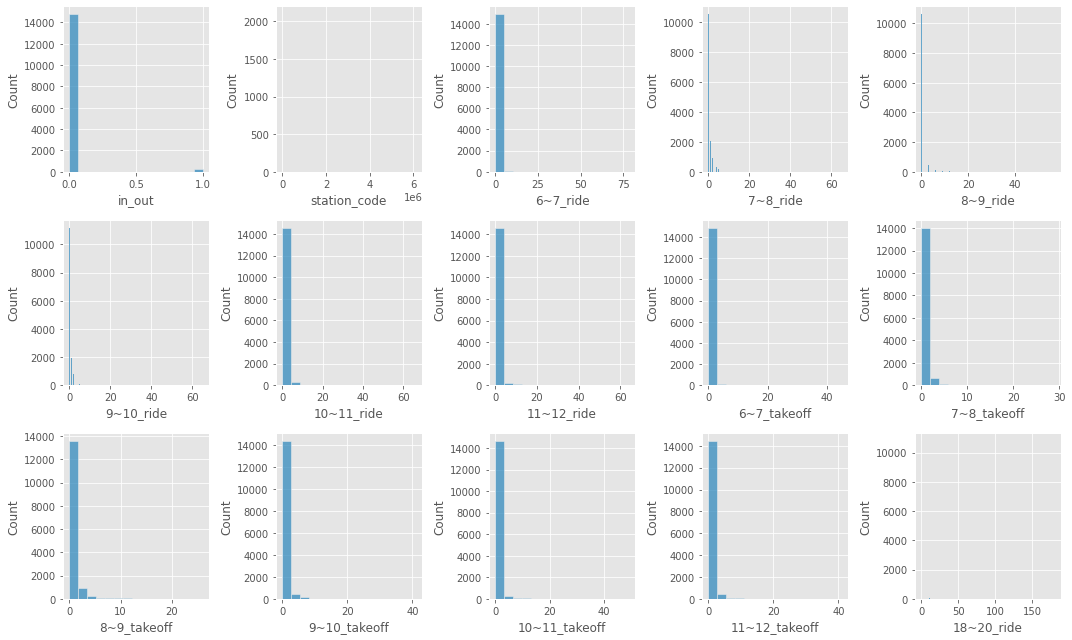

In [ ]:
plt.figure(figsize=(15,9))
for i,colName in enumerate(col):
  plt.subplot(3,5,i+1)
  sns.histplot(train.loc[:,colName])
plt.tight_layout()
plt.show()

음. 스케일링이 필요해보인다. 

In [ ]:
test['year'].value_counts()

0    30
Name: year, dtype: int64

In [ ]:
test['month'].value_counts()

0    30
Name: month, dtype: int64

In [ ]:
test['day'].value_counts()

2     3
7     3
13    2
10    2
22    2
17    2
25    2
5     2
18    2
3     1
26    1
11    1
9     1
1     1
23    1
27    1
16    1
24    1
19    1
Name: day, dtype: int64

In [ ]:
col=['in_out',
       'station_code', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff']

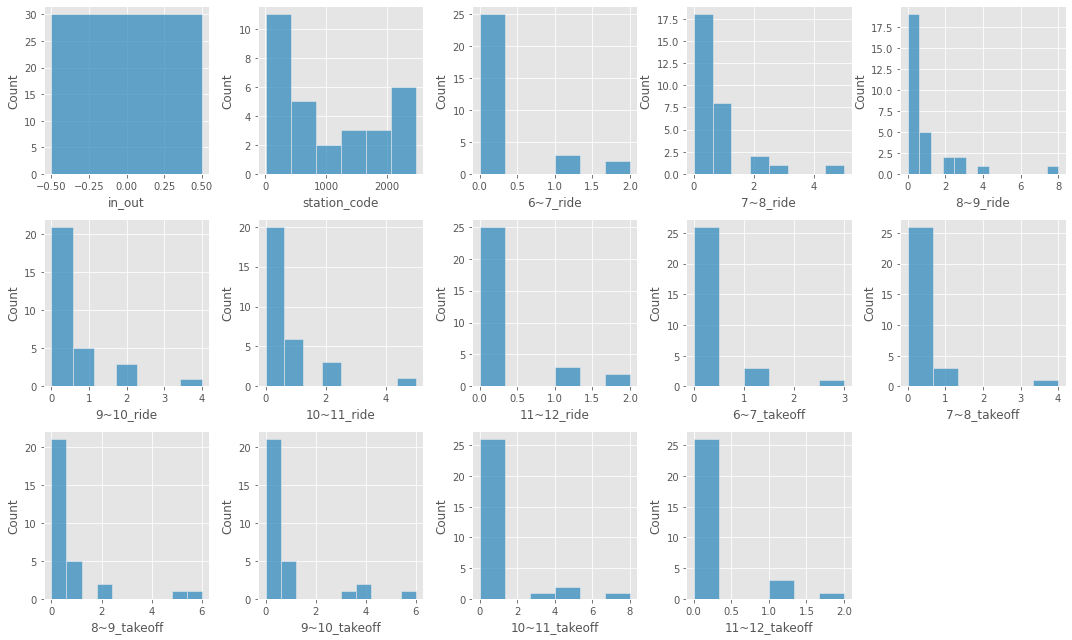

In [ ]:
plt.figure(figsize=(15,9))
for i,colName in enumerate(col):
  plt.subplot(3,5,i+1)
  sns.histplot(test.loc[:,colName])
plt.tight_layout()
plt.show()

In [ ]:
#단일값만있는 year과 month없애주기
train=train.drop(['year','month'],axis=1)
test=test.drop(['year','month'],axis=1)

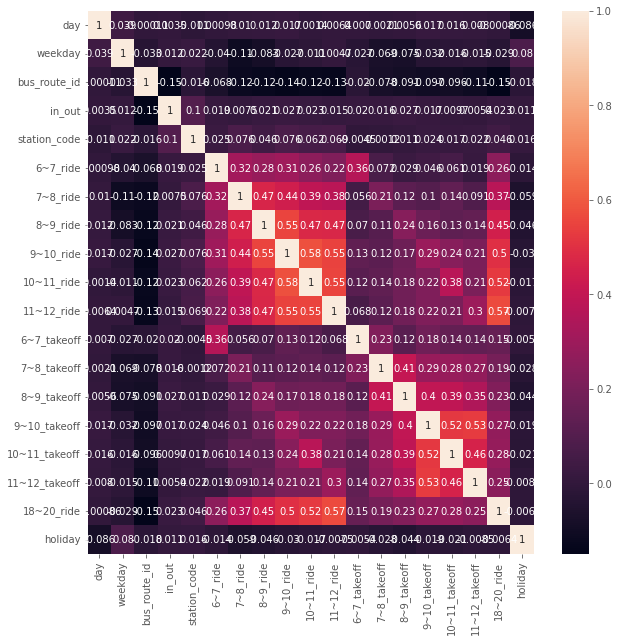

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [ ]:
#id 없애기

train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [ ]:
#나눠주기
X_train=train.drop('18~20_ride',axis=1)
y_train=train['18~20_ride']
X_test=test

In [ ]:
col=X_train.columns
col

Index(['day', 'weekday', 'bus_route_id', 'in_out', 'station_code', '6~7_ride',
       '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
       '10~11_takeoff', '11~12_takeoff', 'holiday'],
      dtype='object')

- bus_route_id : 라벨인코더
- station_code :라벨인코더
- 나머지는 스케일링

In [ ]:
label=['bus_route_id','station_code']

In [ ]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
for i in label:
  X_train[i]=la.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i]=la.transform(X_test[i].values.reshape(-1,1))

display(X_train.head())
print()
display(X_test.head())

,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,holiday
0,29,1,554,0,2319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,14,1,316,0,880,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,17,0,428,0,2179,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,28,1,432,0,174,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,12,0,551,0,2312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,holiday
0,10,0,341,0,1821,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,6,0,500,0,2159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0
2,6,0,461,0,2068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,11,0,469,0,468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,25,0,114,0,148,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0


In [ ]:
sc=['in_out', '6~7_ride',
       '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
       '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
       '10~11_takeoff', '11~12_takeoff']

In [ ]:
from sklearn.preprocessing import StandardScaler

la=StandardScaler()
for i in sc:
  X_train[i]=la.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i]=la.transform(X_test[i].values.reshape(-1,1))

display(X_train.head())
print()
display(X_test.head())

,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,holiday
0,29,1,554,-0.125063,2319,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,0.372397,-0.278786,-0.291608,0
1,14,1,316,-0.125063,880,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,0.223385,-0.166077,-0.28322,-0.325533,-0.286091,0.395479,-0.291608,1
2,17,0,428,-0.125063,2179,-0.248874,0.067620,0.085715,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,0.372397,-0.278786,-0.291608,0
3,28,1,432,-0.125063,174,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,0.223385,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,0
4,12,0,551,-0.125063,2312,-0.248874,-0.356242,-0.367006,-0.317665,0.206846,-0.298706,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,1


,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,holiday
0,10,0,341,-0.125063,1821,-0.248874,-0.356242,0.991157,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,0.319002,-0.286091,-0.278786,-0.291608,0
1,6,0,500,-0.125063,2159,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,2.347861,3.092536,-0.291608,0
2,6,0,461,-0.125063,2068,-0.248874,-0.356242,-0.367006,0.174534,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,0
3,11,0,469,-0.125063,468,-0.248874,0.067620,-0.367006,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,0
4,25,0,114,-0.125063,148,-0.248874,-0.356242,0.085715,-0.317665,-0.314965,0.223385,-0.166077,-0.28322,0.963536,-0.286091,-0.278786,-0.291608,0


## 스케일링 또는 라벨인코더

In [ ]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
for i in col:
  X_train[i]=st.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i]=st.transform(X_test[i].values.reshape(-1,1))

display(X_train.head())
print()
display(X_test.head())

,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,holiday
0,1.523412,1.836274,1.396984,-0.125063,-0.083831,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,0.372397,-0.278786,-0.291608,-0.285977
1,-0.186878,1.836274,0.439301,-0.125063,-0.087860,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,0.223385,-0.166077,-0.28322,-0.325533,-0.286091,0.395479,-0.291608,3.496786
2,0.155180,-0.544581,0.952255,-0.125063,-0.084335,-0.248874,0.067620,0.085715,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,0.372397,-0.278786,-0.291608,-0.285977
3,1.409393,1.836274,0.972470,-0.125063,-0.089646,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,0.223385,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,-0.285977
4,-0.414916,-0.544581,1.389403,-0.125063,-0.083845,-0.248874,-0.356242,-0.367006,-0.317665,0.206846,-0.298706,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,3.496786


,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,holiday
0,-0.756974,-0.544581,-5.953674,-0.125063,-0.086585,-0.248874,-0.356242,0.991157,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,0.319002,-0.286091,-0.278786,-0.291608,-0.285977
1,-1.213052,-0.544581,-5.551902,-0.125063,-0.085948,-0.248874,-0.356242,-0.367006,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,2.347861,3.092536,-0.291608,-0.285977
2,-1.213052,-0.544581,-5.650450,-0.125063,-0.086119,-0.248874,-0.356242,-0.367006,0.174534,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,-0.285977
3,-0.642955,-0.544581,-5.630235,-0.125063,-0.089137,-0.248874,0.067620,-0.367006,-0.317665,-0.314965,-0.298706,-0.166077,-0.28322,-0.325533,-0.286091,-0.278786,-0.291608,-0.285977
4,0.953316,-0.544581,-6.527273,-0.125063,-0.089741,-0.248874,-0.356242,0.085715,-0.317665,-0.314965,0.223385,-0.166077,-0.28322,0.963536,-0.286091,-0.278786,-0.291608,-0.285977


In [ ]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
for i in col:
  X_train[i]=la.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i]=la.transform(X_test[i].values.reshape(-1,1))

display(X_train.head())
print()
display(X_test.head())

,year,month,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,0,0,28,1,554,0,2319,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,13,1,316,0,880,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,16,0,428,0,2179,0,1,1,0,0,0,0,0,0,1,0,0
3,0,0,27,1,432,0,174,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,11,0,551,0,2312,0,0,0,0,1,0,0,0,0,0,0,0


,year,month,day,weekday,bus_route_id,in_out,station_code,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,0,0,9,0,341,0,1821,0,0,3,0,0,0,0,0,1,0,0,0
1,0,0,5,0,500,0,2159,0,0,0,0,0,0,0,0,0,4,5,0
2,0,0,5,0,461,0,2068,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,10,0,469,0,468,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,24,0,114,0,148,0,0,1,0,0,1,0,0,2,0,0,0


In [ ]:
X_train['6~7_takeoff'].value_counts()

0     13972
1       725
2       178
3        57
4        35
5         9
6         5
9         5
8         3
7         3
10        2
13        1
15        1
16        1
11        1
12        1
14        1
Name: 6~7_takeoff, dtype: int64

# 모델 훈련 및 평가

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

estimators=[]

rf=RandomForestRegressor()
estimators.append(rf)

xgb=XGBRegressor()
estimators.append(xgb)

etr=ExtraTreesRegressor()
estimators.append(etr)

params=[]

params_rf={
    'n_estimators':[100,200,300,500],
    'min_samples_split':[1,2,3,4]}
params.append(params_rf)

params_xgb={
    'n_estimatros':[100,300,500],
            'learning_rate':[0.05,0.1,0.3],
            'max_depth':[3,5,7],
            'subsample':[0.1,0.3]
}
params.append(params_xgb)

params_etr={
    'n_estimators':[50,60,70,80,90,100,110,120,130,140,150]
}
params.append(params_etr)

In [ ]:
from tqdm.auto import tqdm

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=5)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models

best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[05:19:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [ ]:
#최고의 모델 확인
best_model_list

[RandomForestRegressor(min_samples_split=4, n_estimators=500),
 XGBRegressor(learning_rate=0.05, max_depth=7, n_estimatros=100, subsample=0.3),
 ExtraTreesRegressor(n_estimators=80)]

In [ ]:
#보팅으로 모델 앙상블 적용

best_models=[
  ('rf',RandomForestRegressor(min_samples_split=4, n_estimators=500)),
  ('xgb',XGBRegressor(learning_rate=0.05, max_depth=7, n_estimatros=100, subsample=0.3)),
  ('ex',ExtraTreesRegressor(n_estimators=80))
]

from sklearn.ensemble import VotingRegressor

voting_rg=VotingRegressor(estimators=best_models)
voting_rg.fit(X_train,y_train)


[05:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(min_samples_split=4,
                                                   n_estimators=500)),
                            ('xgb',
                             XGBRegressor(learning_rate=0.05, max_depth=7,
                                          n_estimatros=100, subsample=0.3)),
                            ('ex', ExtraTreesRegressor(n_estimators=80))])

In [ ]:
pred=voting_rg.predict(X_test)


In [ ]:
sample

,id,18~20_ride
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [ ]:
sample1=sample.copy()
sample1['18~20_ride']=pred
sample1

,id,18~20_ride
0,0,0.369891
1,1,0.400557
2,2,0.149199
3,3,0.117968
4,4,1.209092
5,5,0.886213
6,6,0.088287
7,7,0.244243
8,8,0.168183
9,9,0.530249


In [ ]:

sample1.to_csv('sample1.csv',index=False)

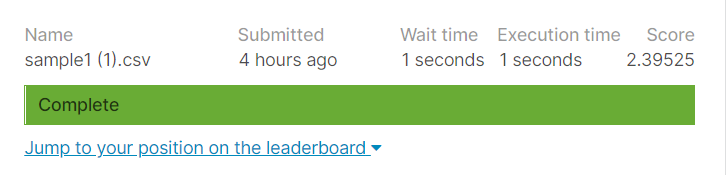

스케일링후

37등 

전처리를 다시해보겠다. 아무 생각없이 스케일링을 한것이 해가된것 같다. 

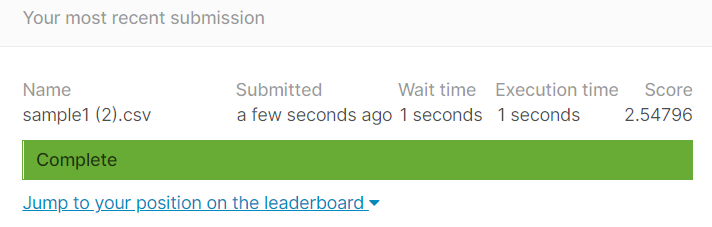

더 내려갔다... 라벨인코딩으로는 안되는듯. 1등어케 안겨

In [ ]:
rf.fit()